# Healthcare Analytics
### The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing datasets
train = pd.read_csv('./Datasets/train.csv')
test = pd.read_csv('./Datasets/test.csv')

## Data Exploration

### Overview of Data

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
train.info()
train.Stay.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [5]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    4532
Bed Grade                             113
Hospital_code                           0
Admission_Deposit                       0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
case_id                                 0
Ward_Facility_Code                      0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Stay                                    0
dtype: int64

In [6]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2157
Bed Grade                              35
case_id                                 0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
Ward_Facility_Code                      0
Hospital_code                           0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Admission_Deposit                       0
dtype: int64

In [7]:
# Dimension of train dataset
train.shape

(318438, 18)

In [8]:
# Dimension of test dataset
test.shape

(137057, 17)

In [9]:
# Number of distinct observations in train dataset 
for i in train.columns:
    print(i, ':', train[i].nunique())

case_id : 318438
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 18
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 92017
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 28
Age : 10
Admission_Deposit : 7300
Stay : 11


In [10]:
# Number of distinct observations in test dataset
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 137057
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 15
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 39607
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 27
Age : 10
Admission_Deposit : 6609


### Data Visualization

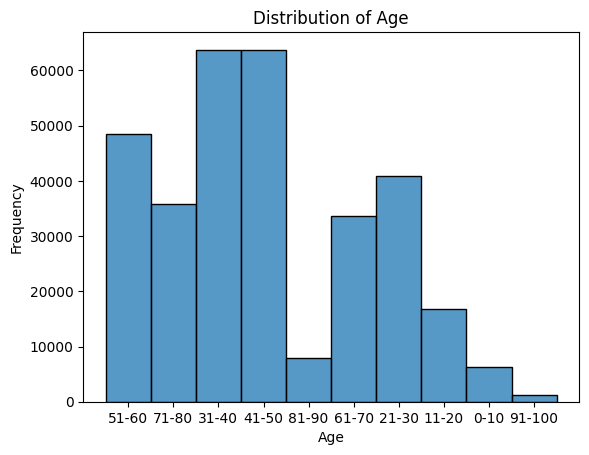

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age

sns.histplot(train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Hospital Type Analysis

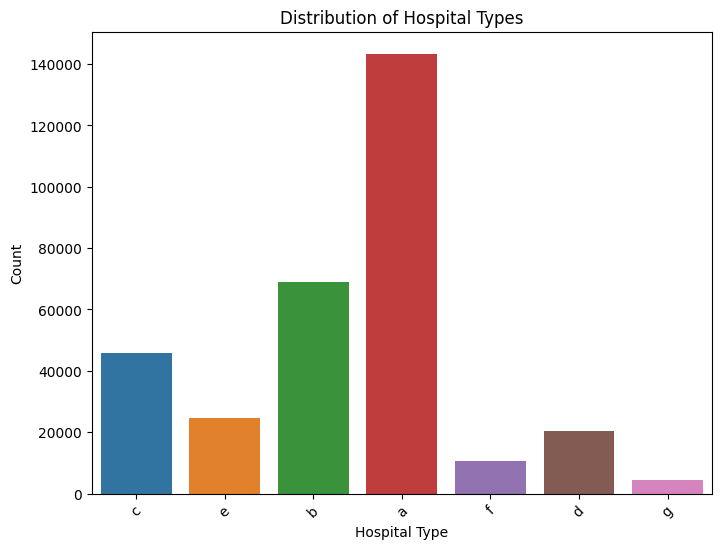

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Hospital_type_code')
plt.xlabel('Hospital Type')
plt.ylabel('Count')
plt.title('Distribution of Hospital Types')
plt.xticks(rotation=45)
plt.show()

Severity of Illness Analysis

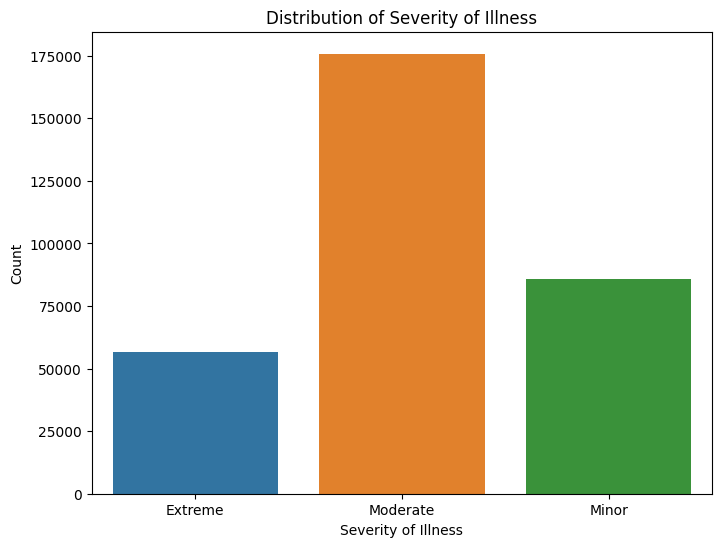

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Count')
plt.title('Distribution of Severity of Illness')
plt.show()


Bed Grade Analysis

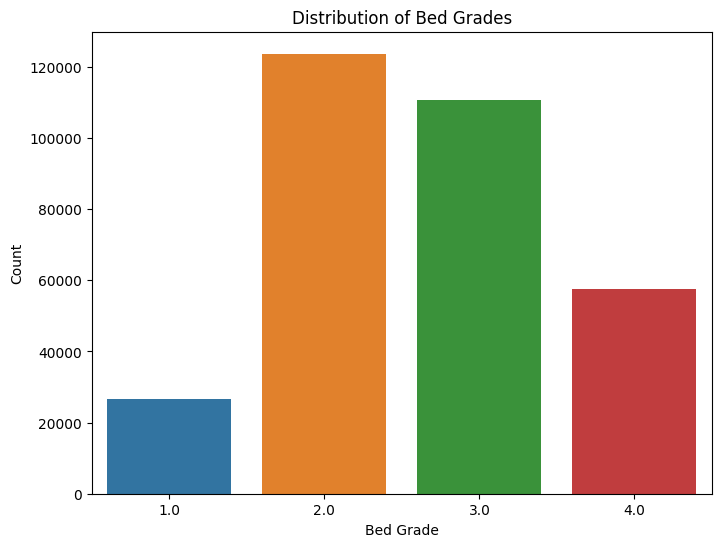

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Bed Grade')
plt.xlabel('Bed Grade')
plt.ylabel('Count')
plt.title('Distribution of Bed Grades')
plt.show()

Admission Type Analysis

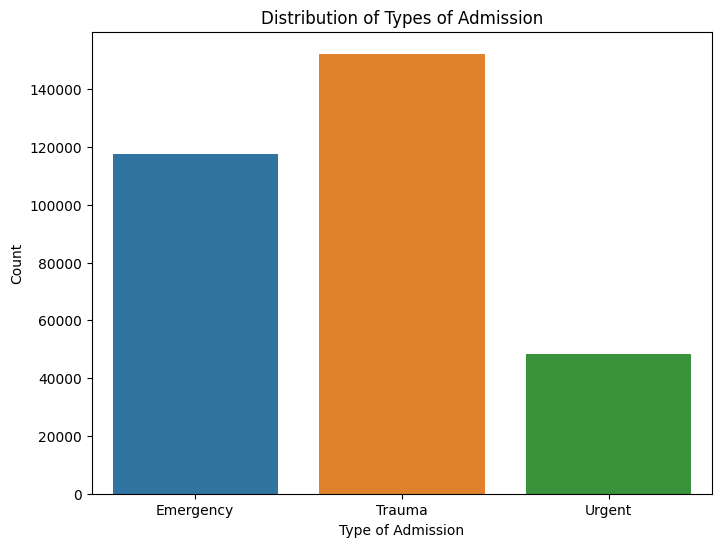

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.title('Distribution of Types of Admission')
plt.show()

Correlation Heatmap

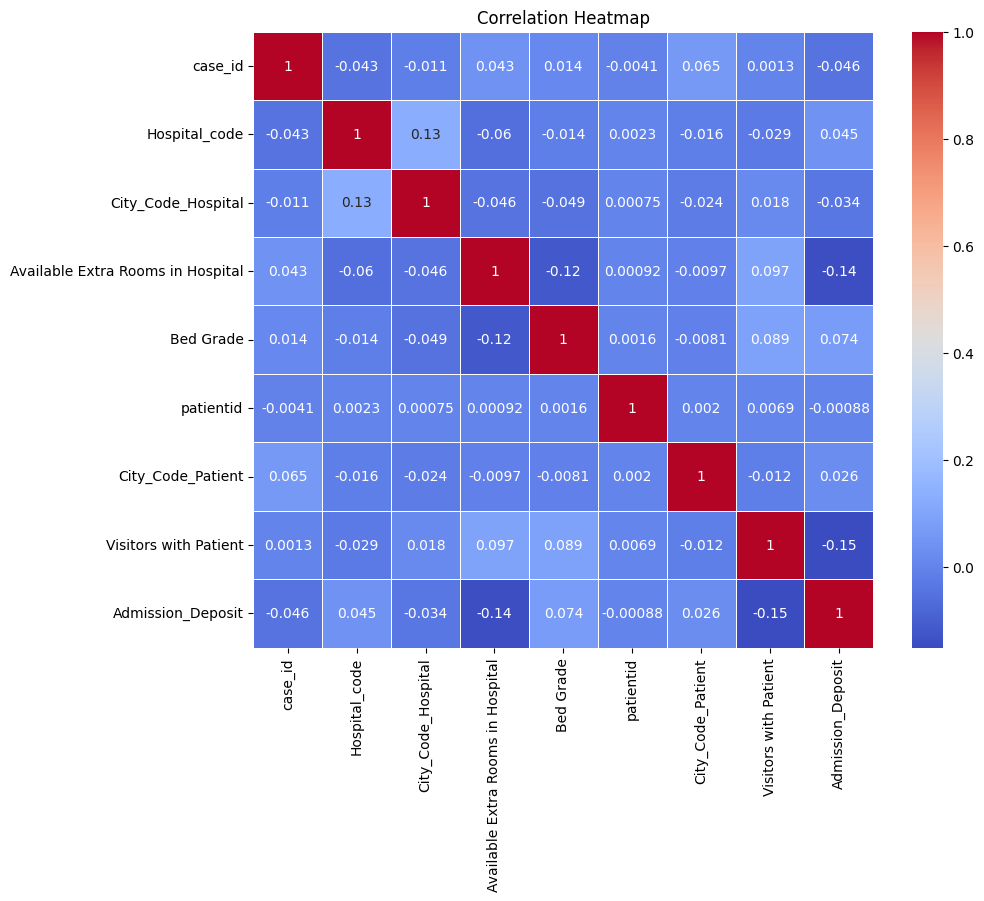

In [18]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

 Age vs. Visitors with Patient

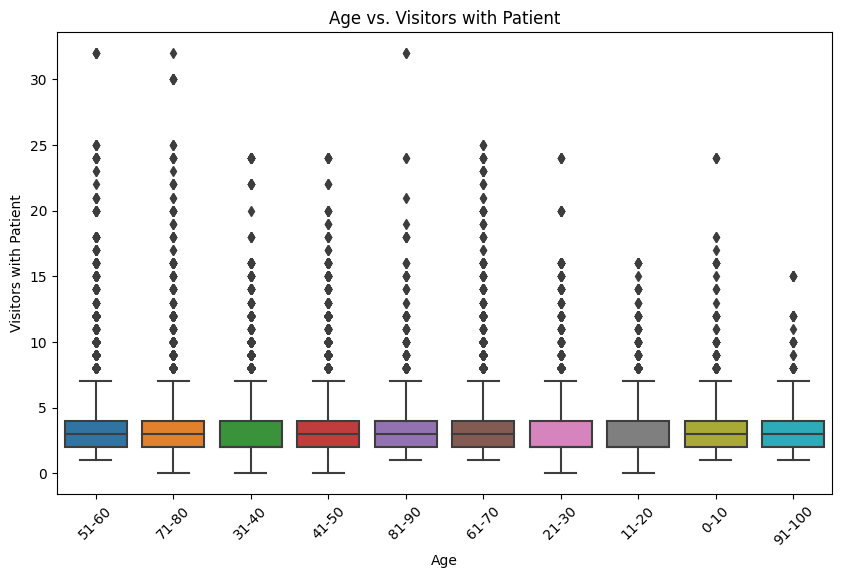

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Age', y='Visitors with Patient')
plt.xlabel('Age')
plt.ylabel('Visitors with Patient')
plt.title('Age vs. Visitors with Patient')
plt.xticks(rotation=45)
plt.show()

### Data Preparation

In [15]:
#Replacing NA values in Bed Grade Column for both Train and Test datssets
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [16]:
#Replacing NA values in  Column for both Train and Test datssets
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [17]:
# Label Encoding Stay column in train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

In [18]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [19]:
#Imputing dummy Stay column in test datset to concatenate with train dataset
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(455495, 18)

In [16]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [17]:
#Spearating Train and Test Datasets
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

### Feature Engineering

In [18]:
def get_countid_enocde(train, test, cols, name):
  temp = train.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train = pd.merge(train, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  train[name] = train[name].astype('float')
  test[name] = test[name].astype('float')
  train[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return train, test

In [19]:
train, test = get_countid_enocde(train, test, ['patientid'], name = 'count_id_patient')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [20]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [21]:
# Splitting train data for Naive Bayes and XGBoost
X1 = train1.drop('Stay', axis =1)
y1 = train1['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

## Models

### Naive Bayes Model

In [22]:
from sklearn.naive_bayes import GaussianNB
target = y_train.values
features = X_train.values
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(features, target)

In [23]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 34.55439015199096


### XGBoost Model

In [24]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

In [25]:
model_xgb = classifier_xgb.fit(X_train, y_train)

In [26]:
prediction_xgb = model_xgb.predict(X_test)
acc_score_xgb = accuracy_score(prediction_xgb,y_test)
print("Accuracy:", acc_score_xgb*100)

Accuracy: 43.047355859816605


### Neural Network

In [27]:
# Segregation of features and target variable
X = train.drop('Stay', axis =1)
y = train['Stay']
print(X.columns)
z = test.drop('Stay', axis = 1)
print(z.columns)

# Data Scaling
from sklearn import preprocessing
X_scale = preprocessing.scale(X)
X_scale.shape

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')
Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')


(318438, 20)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size =0.20, random_state =100)

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [30]:
from keras.utils import to_categorical
#Sparse Matrix
a = to_categorical(y_train)
b = to_categorical(y_test)

In [31]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (254750, 20))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 254750, 64)        1344      
_________________________________________________________________
dense_1 (Dense)              (None, 254750, 128)       8320      
_________________________________________________________________
dense_2 (Dense)              (None, 254750, 256)       33024     
_________________________________________________________________
dense_3 (Dense)              (None, 254750, 512)       131584    
_________________________________________________________________
dense_4 (Dense)              (None, 254750, 512)       262656    
_________________________________________________________________
dense_5 (Dense)              (None, 254750, 11)        5643      
Total params: 442,571
Trainable params: 442,571
Non-trainable params: 0
__________________________________________________

In [33]:
model.compile(optimizer= 'SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
callbacks = [tf.keras.callbacks.TensorBoard("logs_keras")]
model.fit(X_train, a, epochs=20, callbacks=callbacks, validation_split = 0.2)

Epoch 1/20
   1/6369 [..............................] - ETA: 0s - loss: 2.3814 - accuracy: 0.2188WARNING:tensorflow:From /Users/arjunmac/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
6369/6369 [==============================] - 15s 2ms/step - loss: 1.6575 - accuracy: 0.3686 - val_loss: 1.5884 - val_accuracy: 0.3953
Epoch 2/20
6369/6369 [==============================] - 17s 3ms/step - loss: 1.5681 - accuracy: 0.3995 - val_loss: 1.5608 - val_accuracy: 0.4016
Epoch 3/20
6369/6369 [==============================] - 19s 3ms/step - loss: 1.5468 - accuracy: 0.4073 - val_loss: 1.5455 - val_accuracy: 0.4088
Epoch 4/20
6369/6369 [==============================] - 18s 3ms/step - loss: 1.5339 - accuracy: 0.4105 - val_loss: 1.5370 - val_accuracy: 0.4148
Epoch 5/20
6369/6369 [===============

In [ ]:
# Genrating tensorboard
!tensorboard --logdir logs_keras

In [36]:
# Retraining the model with 4 epochs
model.fit(X_train, a, epochs=4, validation_split = 0.2)
print("\n Model Evaluation")
model.evaluate(X_test,b)

Epoch 1/4
6369/6369 [==============================] - 14s 2ms/step - loss: 1.4689 - accuracy: 0.4347 - val_loss: 1.5081 - val_accuracy: 0.4209
Epoch 2/4
6369/6369 [==============================] - 15s 2ms/step - loss: 1.4669 - accuracy: 0.4353 - val_loss: 1.5071 - val_accuracy: 0.4222
Epoch 3/4
6369/6369 [==============================] - 14s 2ms/step - loss: 1.4647 - accuracy: 0.4361 - val_loss: 1.5067 - val_accuracy: 0.4188
Epoch 4/4
6369/6369 [==============================] - 14s 2ms/step - loss: 1.4619 - accuracy: 0.4362 - val_loss: 1.5066 - val_accuracy: 0.4222

 Model Evaluation
1991/1991 [==============================] - 2s 844us/step - loss: 1.5048 - accuracy: 0.4220


[1.5047825574874878, 0.42199471592903137]

# Predictions

In [37]:
# Naive Bayes
pred_nb = classifier_nb.predict(test1.iloc[:,1:])
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])
result_nb['case_id'] = test1['case_id']
result_nb = result_nb[['case_id', 'Stay']]

In [38]:
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [39]:
# XGBoost
pred_xgb = classifier_xgb.predict(test1.iloc[:,1:])
result_xgb = pd.DataFrame(pred_xgb, columns=['Stay'])
result_xgb['case_id'] = test1['case_id']
result_xgb = result_xgb[['case_id', 'Stay']]

In [40]:
result_xgb['Stay'] = result_xgb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_xgb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [41]:
# Neural Network
test_scale = preprocessing.scale(z)
test_scale.shape

(137057, 20)

In [42]:
pred = model.predict_classes(test_scale)
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 5, 2, ..., 1, 1, 5])

In [43]:
result_nn = pd.DataFrame(pred, columns=['Stay'])
result_nn['case_id'] = test['case_id']
result_nn = result_nn[['case_id', 'Stay']]

In [44]:
result_nn['Stay'] = result_nn['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nn.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


## Results

In [45]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   2598
11-20                 26827
21-30                 72206
31-40                 15639
41-50                   469
51-60                 13651
61-70                    92
71-80                   955
81-90                   296
91-100                    2
More than 100 Days     4322
Name: case_id, dtype: int64


In [46]:
# XGBoost
print(result_xgb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   4373
11-20                 39337
21-30                 58261
31-40                 12100
41-50                    61
51-60                 19217
61-70                    16
71-80                   302
81-90                  1099
91-100                   78
More than 100 Days     2213
Name: case_id, dtype: int64


In [47]:
# Neural Networks
print(result_nn.groupby('Stay')['case_id'].nunique())

Stay
0-10                   5379
11-20                 41215
21-30                 55240
31-40                 10926
41-50                     9
51-60                 20016
71-80                    29
81-90                  1126
More than 100 Days     3117
Name: case_id, dtype: int64
